In [32]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import xml.etree.ElementTree as et

In [14]:
# 현재 디렉토리 설정
cur_dir = os.getcwd()

# 데이터 디렉토리 설정
data_dir = os.path.join(cur_dir, 'oxford_pet')

# 이미지 디렉토리 설정
image_dir = os.path.join(data_dir, 'images')

# bounding box 좌표값이 들어있는 디렉토리 설정
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')

# segmentation 디렉토리 설정
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [31]:
# 이미지 파일 확인 확장자 기준으로 파일안에 다른 파일이 있는지 확인
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']

print(len(image_files))
image_files[:10]

7390


['Egyptian_Mau_167.jpg',
 'pug_52.jpg',
 'basset_hound_112.jpg',
 'Siamese_193.jpg',
 'shiba_inu_122.jpg',
 'Siamese_53.jpg',
 'Birman_167.jpg',
 'leonberger_6.jpg',
 'Siamese_47.jpg',
 'shiba_inu_136.jpg']

In [30]:
# bounding box 파일 확인 확장자 기준으로 파일안에 다른 파일이 있는지 확인
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']

print(len(bbox_files)) # 모든이미지에대해서 bbox가 있는거는 아님
bbox_files[:10]

3686


['British_Shorthair_10.xml',
 'german_shorthaired_119.xml',
 'english_setter_158.xml',
 'Siamese_178.xml',
 'pomeranian_162.xml',
 'newfoundland_137.xml',
 'Siamese_150.xml',
 'german_shorthaired_131.xml',
 'english_setter_170.xml',
 'english_setter_164.xml']

In [29]:
# segmentation 파일 확인 확장자 기준으로 파일안에 다른 파일이 있는지 확인
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']

print(len(seg_files))
seg_files[:10]

7390


['american_pit_bull_terrier_172.png',
 'boxer_190.png',
 'Sphynx_8.png',
 'keeshond_37.png',
 'Siamese_5.png',
 'Bengal_99.png',
 'boxer_184.png',
 'keeshond_23.png',
 'american_pit_bull_terrier_99.png',
 'american_pit_bull_terrier_166.png']

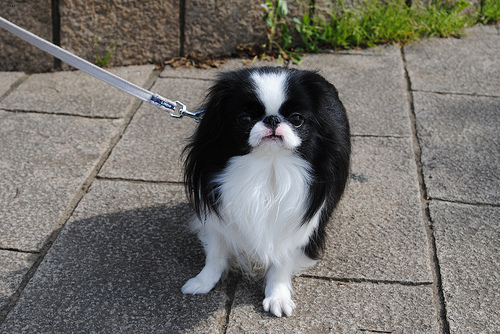

In [38]:
# 랜덤 index설정 
rnd_idx = random.randint(1, len(image_files))
fname = image_files[rnd_idx]
fpath = os.path.join(image_dir, fname)

#이미지 보기
image = Image.open(fpath)
image

In [43]:
# array 변환
image = np.array(image)

### bounding box 

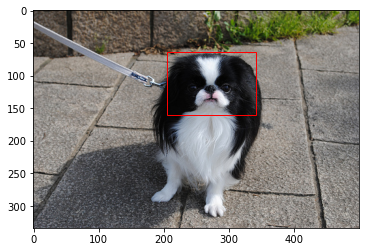

In [64]:
# bbox 이름 설정
bbox_name = os.path.splitext(fname)[0]+'.xml'
bbox_path = os.path.join(bbox_dir, bbox_name)

tree = et.parse(bbox_path)
# 파싱
width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

# 사각형 좌표값
rect_x = xmin
rect_y = ymin
rect_w = xmax-xmin
rect_h = ymax-ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

### segmentation

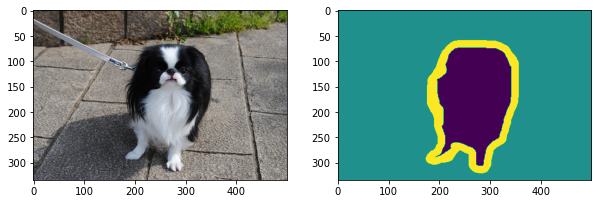

In [68]:
# segmentation 이름 설정
sname = os.path.splitext(fname)[0]+'.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)
seg = np.array(seg)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg)
plt.show()